# Propriedade da multiplicação e janelas

Imagine que você tenha um fenômeno (ou sinal) com duração infinita, $x(t)$, que deseja observar (medir).

Quando medimos $x(t)$ por um tempo finito estamos observando o fenômeno por uma janela temporal $w(t)$ finita. Na prática, o sinal observado é:

\begin{equation}
x_o(t) = x(t)w(t) 
\end{equation}

e pela propriedade da dualidade e do teorema da convolução, o espectro observado será

\begin{equation}
X_o(\mathrm{j} \omega) = X(\mathrm{j} \omega) * W(\mathrm{j} \omega) 
\end{equation}

ou seja, o espectro observado terá em si as características do fenômeno em si e da janela de observação. Vamos investigar os espectros dos sinais $x(t)$, $w(t)$ e $x_o(t)$.

In [2]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
from scipy import signal

# O sinal infinito (ou ao menos de longa duração)

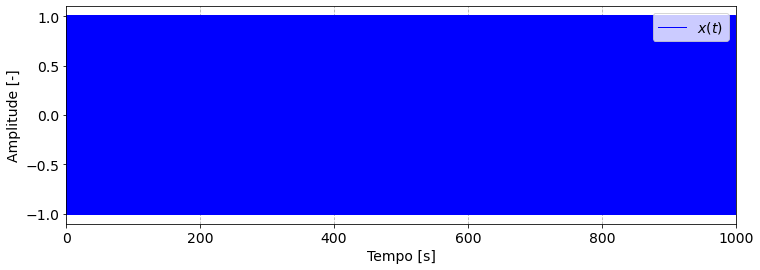

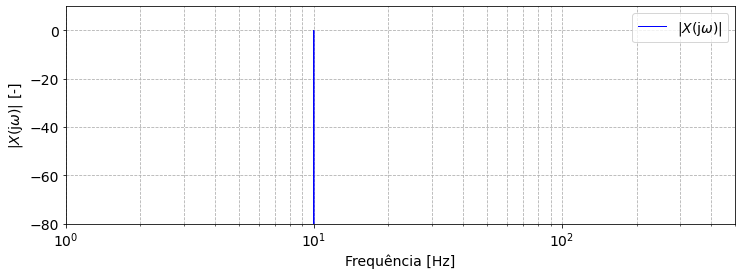

In [3]:
fs = 1000
time = np.arange(0, 1000, 1/fs)
xt = np.cos(2*np.pi*10*time)
# Espectro
Xjw = np.fft.fft(xt)
freq = np.linspace(0, (len(Xjw)-1)*fs/len(Xjw), len(Xjw))

# tempo
plt.figure(figsize=(12,4))
plt.plot(time, xt, '-b', linewidth = 1, label = r'$x(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 1000))

# frequencia
plt.figure(figsize=(12,4))
plt.semilogx(freq, 20*np.log10(2*np.abs(Xjw)/len(Xjw)), '-b', linewidth = 1, label = r'$|X(\mathrm{j} \omega)|$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j} \omega)|$ [-]')
plt.xlim((1, fs/2))
plt.ylim((-80, 10));

# Definamos algumas janelas

1. Retangular
2. Hanning
3. Hammming

C:\Users\ericb\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


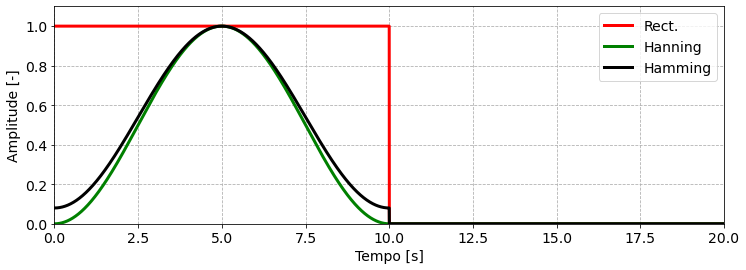

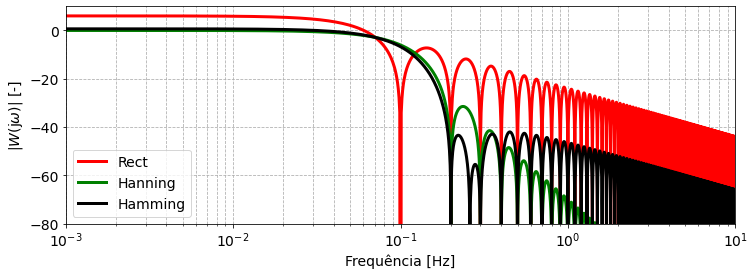

In [8]:
# Tempo de observação
Tp = 10
Np = len(time[time<Tp]) # numero de amostras contidas na janela de observação (início do sinal)
tw = np.linspace(0, Tp, Np) # vetor temporal de observação

# Janela retangular
w_ret = np.concatenate((np.ones(Np), np.zeros(len(xt)-Np)))
W_ret = np.fft.fft(w_ret)

# Janela Hanning
w_hann = np.concatenate((signal.hann(Np), np.zeros(len(xt)-Np)))
W_hann = np.fft.fft(w_hann)

# Janela Hamming
w_hamm = np.concatenate((signal.hamming(Np), np.zeros(len(xt)-Np)))
W_hamm = np.fft.fft(w_hamm)

# tempo
plt.figure(figsize=(12,4))
plt.plot(time, w_ret, '-r', linewidth = 3, label = 'Rect.')
plt.plot(time, w_hann, '-g', linewidth = 3, label = 'Hanning')
plt.plot(time, w_hamm, '-k', linewidth = 3, label = 'Hamming')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 2*Tp))
plt.ylim((0, 1.1))

# frequencia
plt.figure(figsize=(12,4))
plt.semilogx(freq, 20*np.log10(2*np.abs(W_ret)/Np), '-r', linewidth = 3, label = 'Rect')
plt.semilogx(freq, 20*np.log10(2*np.abs(W_hann)/Np), '-g', linewidth = 3, label = 'Hanning')
plt.semilogx(freq, 20*np.log10(2*np.abs(W_hamm)/Np), '-k', linewidth = 3, label = 'Hamming')
plt.legend(loc = 'lower left')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|W(\mathrm{j} \omega)|$ [-]')
plt.xlim((0.001, 10))
plt.ylim((-80, 10));


# Observemos o espectro resultante

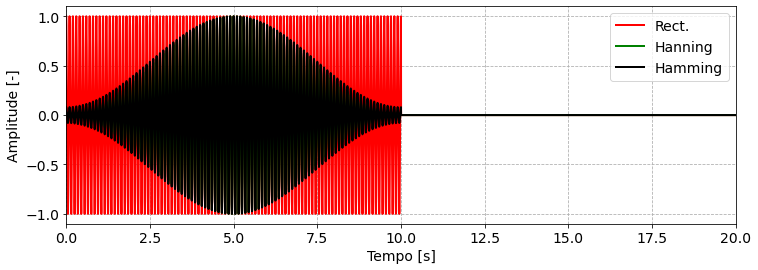

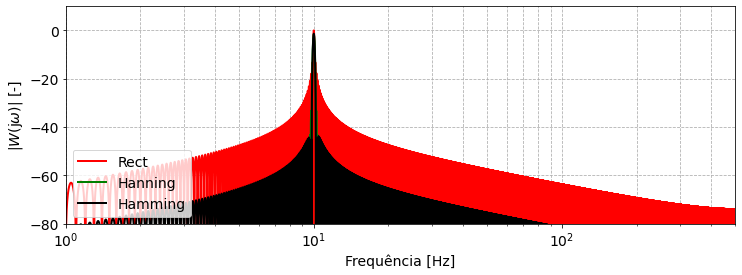

In [9]:
# Retangular
xo_ret = xt*w_ret
Xo_ret = np.fft.fft(xo_ret)

# Hanning
xo_hann = xt*w_hann
Xo_hann = np.fft.fft(xo_hann)
f_hann = np.sqrt(np.sum(w_ret**2)/np.sum(w_hann**2))

# Hamming
xo_hamm = xt*w_hamm
Xo_hamm = np.fft.fft(xo_hamm)
f_hamm = np.sqrt(np.sum(w_ret**2)/np.sum(w_hamm**2))

# tempo
plt.figure(figsize=(12,4))
plt.plot(time, xo_ret, '-r', linewidth = 2, label = 'Rect.')
plt.plot(time, xo_hann, '-g', linewidth = 2, label = 'Hanning')
plt.plot(time, xo_hamm, '-k', linewidth = 2, label = 'Hamming')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 2*Tp))
plt.ylim((-1.1, 1.1))

# frequencia
plt.figure(figsize=(12,4))
plt.semilogx(freq, 20*np.log10(2*np.abs(Xo_ret)/Np), '-r', linewidth = 2, label = 'Rect')
plt.semilogx(freq, 20*np.log10(2*f_hann*np.abs(Xo_hann)/Np), '-g', linewidth = 2, label = 'Hanning')
plt.semilogx(freq, 20*np.log10(2*f_hamm*np.abs(Xo_hamm)/Np), '-k', linewidth = 2, label = 'Hamming')
plt.legend(loc = 'lower left')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|W(\mathrm{j} \omega)|$ [-]')
plt.xlim((1, fs/2))
plt.ylim((-80, 10));
